# Statistical Analysis

In [1]:
%pip install matplotlib
%pip install pandas
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Data Properties

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv('quantitative_data.csv',
                 true_values=['WAHR'],
                 false_values=['FALSCH'],
                )

interface_A = df[df['Interface'] == 'A']
interface_B = df[df['Interface'] == 'B']

### Task 1: Time Needed to See Which of My Tasks Are Due in the Next Days

In [18]:
task_1_time_A = interface_A['Task 1 Time [s]']
task_1_time_B = interface_B['Task 1 Time [s]']

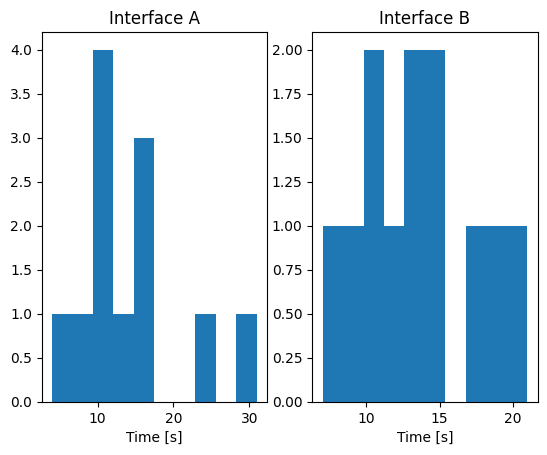

In [21]:
plt.subplot(1, 2, 1)
plt.hist(task_1_time_A)
plt.xlabel('Time [s]')
plt.title('Interface A')
plt.subplot(1, 2, 2)
plt.hist(task_1_time_B)
plt.xlabel('Time [s]')
plt.title('Interface B')
plt.show()

In [28]:
display(stats.shapiro(task_1_time_A), stats.shapiro(task_1_time_B))

ShapiroResult(statistic=0.9261507987976074, pvalue=0.3410911560058594)

ShapiroResult(statistic=0.9680989384651184, pvalue=0.889902651309967)

Even though the histograms don't look like typical normally distributed data, the Shapiro-Wilk test clearly shows that the data is normally distributed. The p-values for both interfaces are above 0.05, so our null hypothesis (the data is normally distributed) cannot be rejected.

In [33]:
stats.levene(task_1_time_A, task_1_time_B)

LeveneResult(statistic=1.642951833848873, pvalue=0.21326540639550026)

The Levene test shows that the variances of the two interfaces are equal. The p-value is above 0.05, so our null hypothesis (homoscedasticity of the data) cannot be rejected.

### Task 2: Time Needed to Read the Information of any Task

In [30]:
task_2_time_A = interface_A['Task 2 Time [s]']
task_2_time_B = interface_B['Task 2 Time [s]']

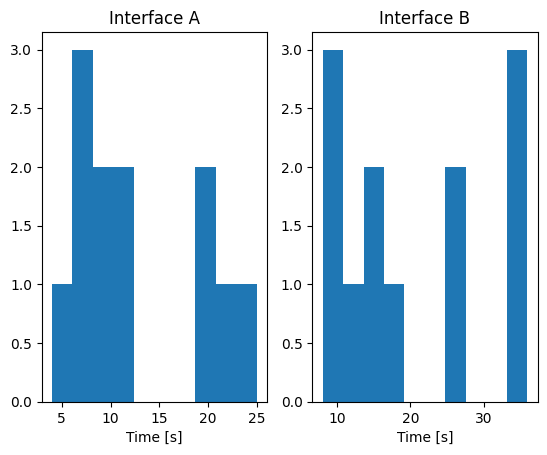

In [31]:
plt.subplot(1, 2, 1)
plt.hist(task_2_time_A)
plt.xlabel('Time [s]')
plt.title('Interface A')
plt.subplot(1, 2, 2)
plt.hist(task_2_time_B)
plt.xlabel('Time [s]')
plt.title('Interface B')
plt.show()

In [32]:
display(stats.shapiro(task_2_time_A), stats.shapiro(task_2_time_B))

ShapiroResult(statistic=0.8798807859420776, pvalue=0.08733870834112167)

ShapiroResult(statistic=0.8599857091903687, pvalue=0.04886643588542938)

While the data for interface A is normally distributed, the data for interface B is not. The Shapiro-Wilk test shows that the p-value for interface B is below 0.05, so our null hypothesis (the data is normally distributed) can be rejected for interface B.

In [34]:
stats.levene(task_2_time_A, task_2_time_B)

LeveneResult(statistic=2.2891424075531073, pvalue=0.14451591105326236)

The Levene test shows that the variances of the two interfaces are equal. The p-value is above 0.05, so our null hypothesis (homoscedasticity of the data) cannot be rejected.

### Task 3: Reading the full and correct information of a task
This task was interwoven with tasks 1 and 2, because the participants had to find a hidden message by themselves. The message prompted the participant to announce to the experimenter that they had found it.

In [46]:
task_3_found_message_A = interface_A['Hidden message noticed']
task_3_found_message_B = interface_B['Hidden message noticed']

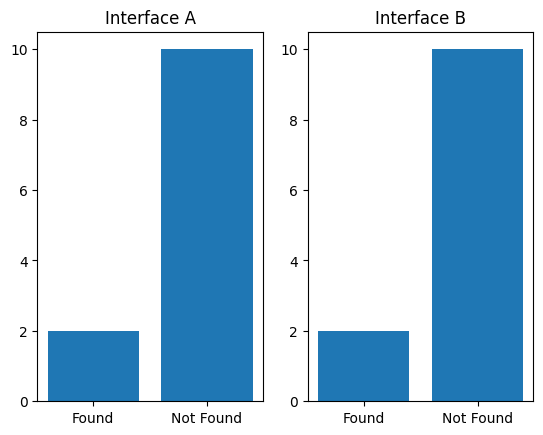

In [49]:
plt.subplot(1, 2, 1)
plt.bar(['Found', 'Not Found'], [task_3_found_message_A.sum(), task_3_found_message_A.count() - task_3_found_message_A.sum()])
plt.title('Interface A')
plt.subplot(1, 2, 2)
plt.bar(['Found', 'Not Found'], [task_3_found_message_B.sum(), task_3_found_message_B.count() - task_3_found_message_B.sum()])
plt.title('Interface B')
plt.show()